In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Reading Dataset
data = pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1') #Reading a File

In [3]:
#returns the first n rows for the object based on position
data.head() 

,customer name,JobTitle,customer e-mail,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [4]:
#printing information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   JobTitle             500 non-null    object 
 2   customer e-mail      500 non-null    object 
 3   country              500 non-null    object 
 4   gender               500 non-null    int64  
 5   age                  500 non-null    int64  
 6   BasePay              500 non-null    float64
 7   OvertimePay          500 non-null    float64
 8   OtherPay             500 non-null    float64
 9   Benefits             0 non-null      float64
 10  TotalPay             500 non-null    float64
 11  TotalPayBenefits     500 non-null    float64
 12  credit card debt     500 non-null    float64
 13  net worth            500 non-null    float64
 14  car purchase amount  500 non-null    float64
dtypes: float64(9), int64(2), object(4)
memor

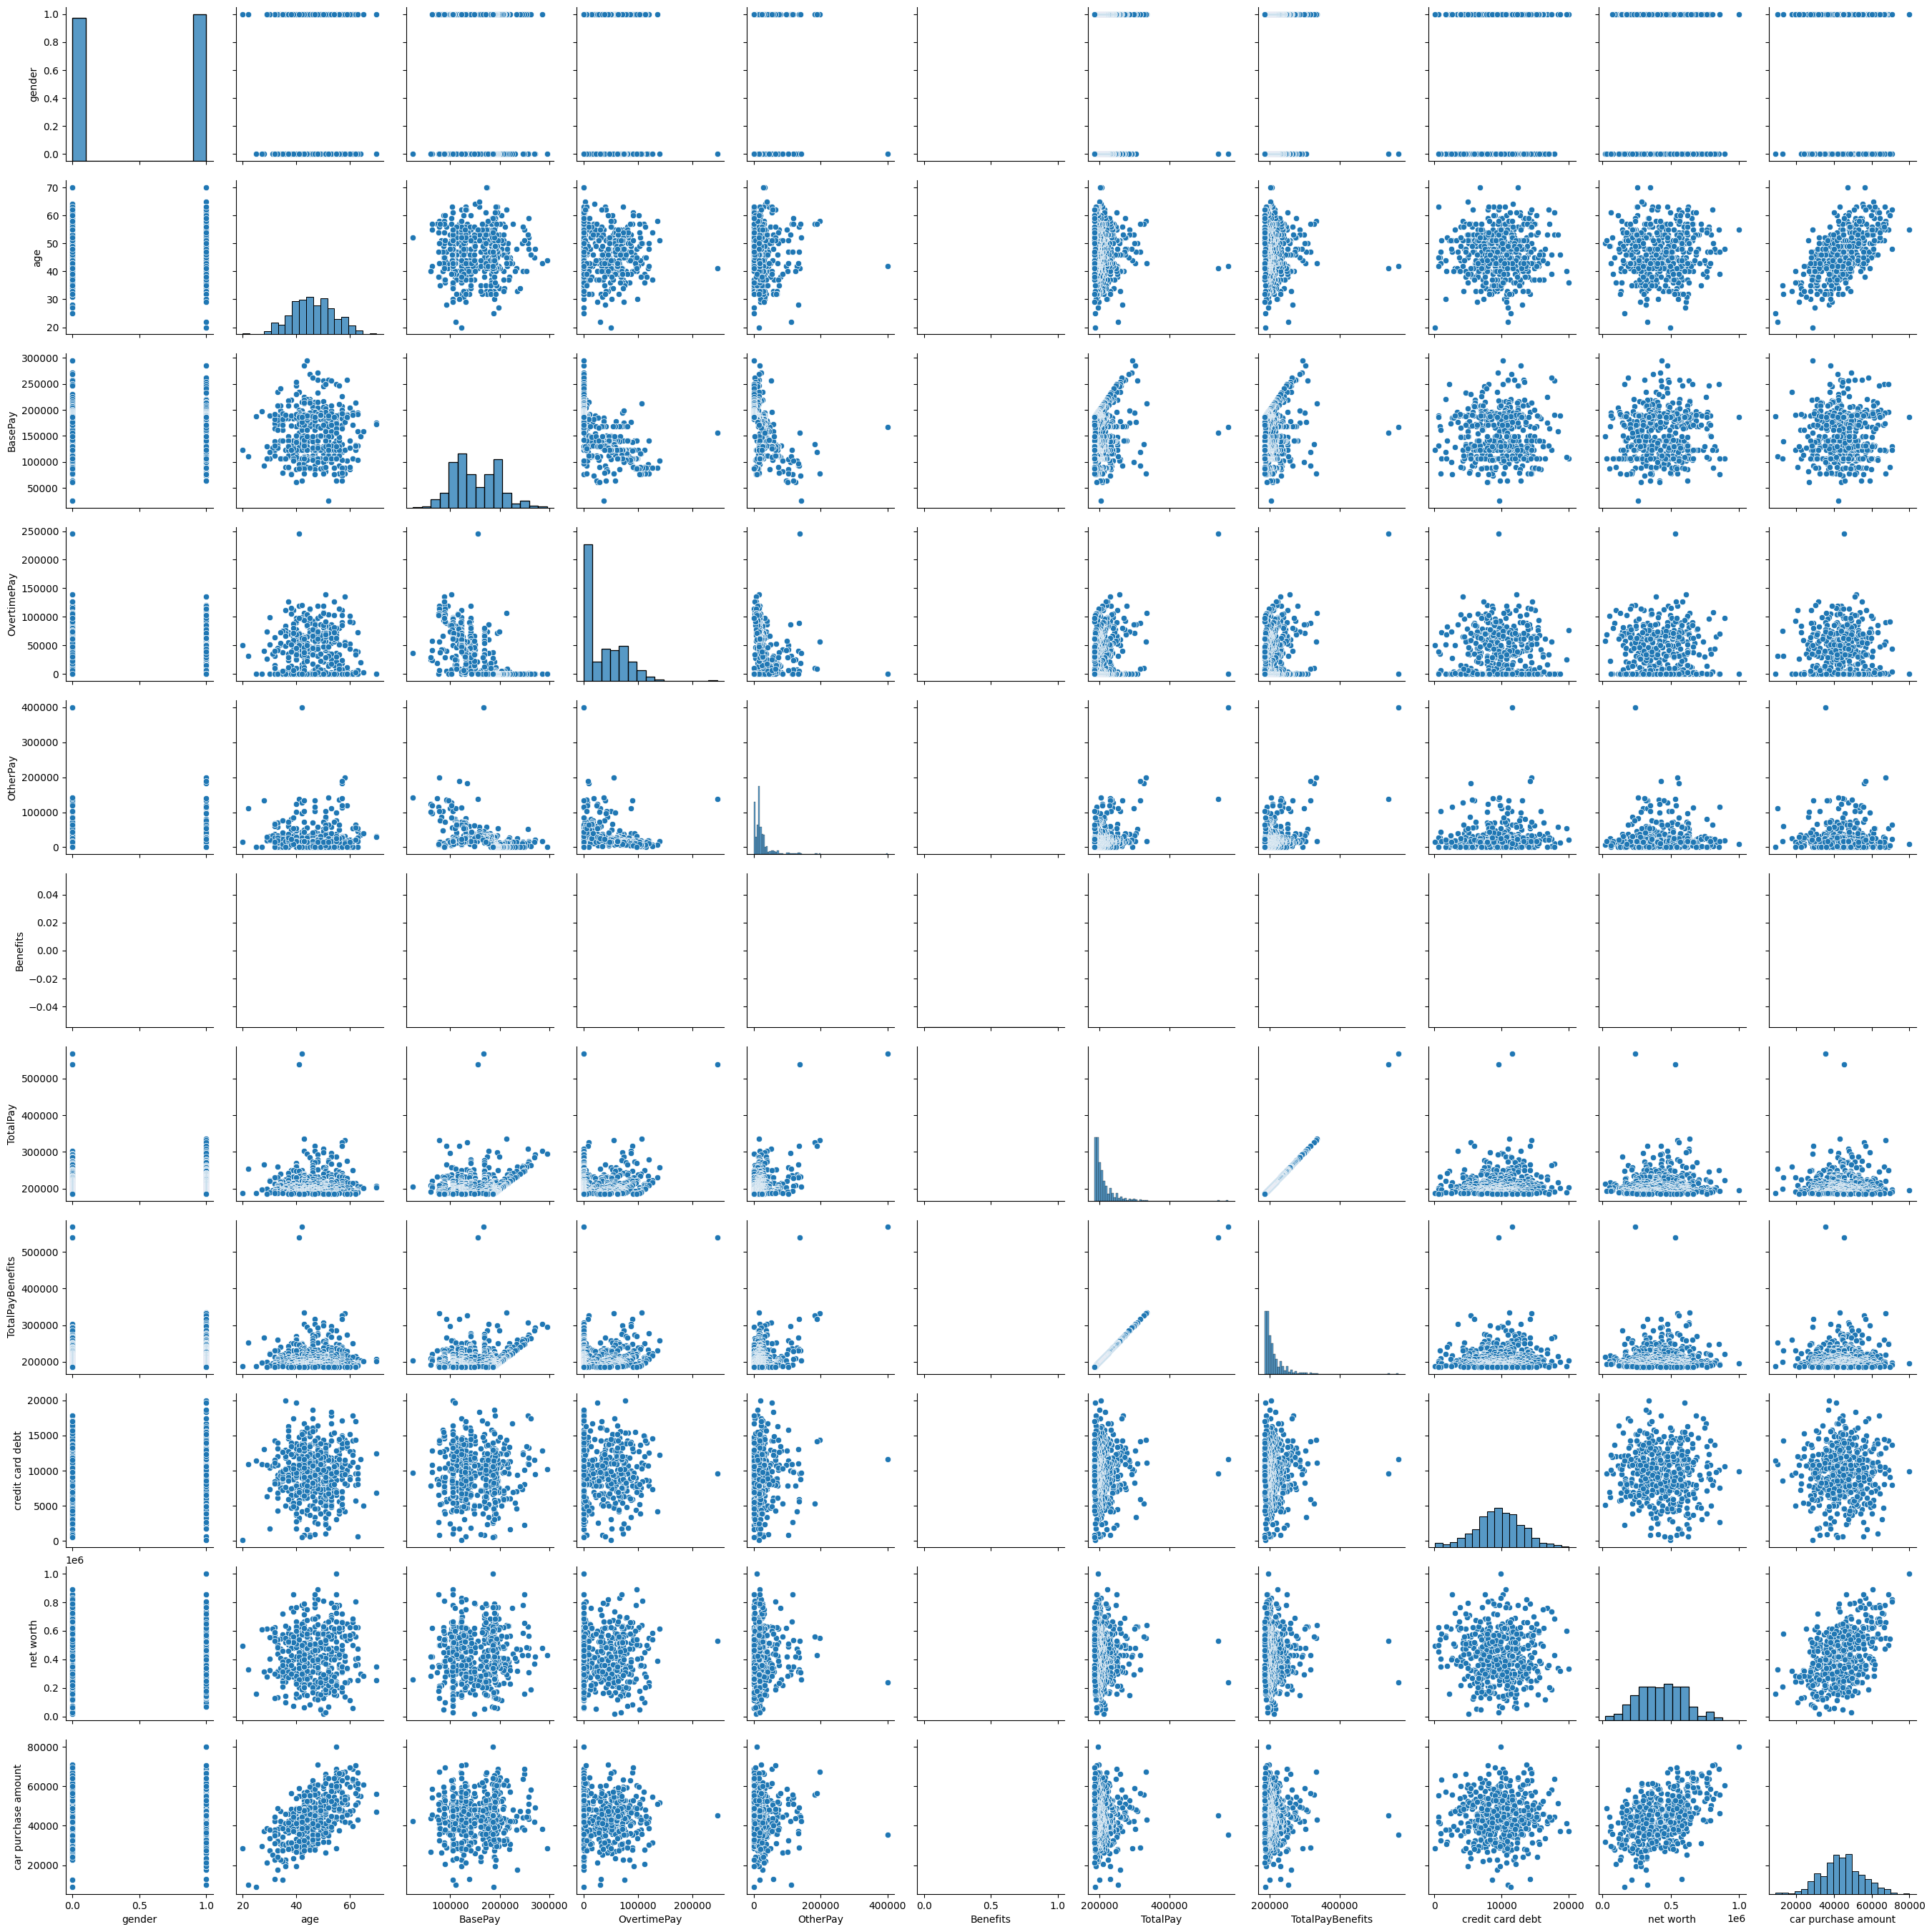

In [5]:
#VISUALIZE DATASET
sns.pairplot(data)

In [6]:
#Missing data check
data.isna().sum()

customer name            0
JobTitle                 0
customer e-mail          0
country                  0
gender                   0
age                      0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits               500
TotalPay                 0
TotalPayBenefits         0
credit card debt         0
net worth                0
car purchase amount      0
dtype: int64

In [7]:
#TRAINING DATASET AND DATA CLEANING
#Dropping columns
car_df= data.drop(columns=["customer name","customer e-mail","country","JobTitle","Benefits"],axis=1)

In [9]:
#Define X and Y
y = car_df[["car purchase amount"]]
X = car_df.drop(["car purchase amount"],axis=1)

In [10]:
X.shape

(500, 9)

In [11]:
y.shape

(500, 1)

In [12]:
car_df.head()

,gender,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
0,0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,0,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,1,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,1,58,77916.00,56120.71,198306.90,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,1,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [13]:
#Pre-Processing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
y= y.values.reshape(-1,1)

In [15]:
y_scaled = scaler.fit_transform(y)

In [16]:
print(X_scaled.shape,y_scaled.shape)

(500, 9) (500, 1)


In [18]:
#training the model
#Division of data in tarining and testing set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,y_scaled,test_size=0.25)

In [19]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(375, 9) (375, 1) (125, 9) (125, 1)


In [21]:
#initially preparing the model using RandomForest and check the accuracy 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain.ravel())
print(model.score(xtest, ytest)*100)

57.93211945807988


In [22]:
#ANN Model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(25, input_dim=9, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                250       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 926 (3.62 KB)
Trainable params: 926 (3.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
#defining the loss function
#Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#epoch-number times that the learning algorithm will work through the entire training dataset.
model.compile(optimizer='adam',loss='mean_squared_error')
epochs_hist = model.fit(xtrain,ytrain,epochs=10,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/10
6/6 [==============================] - 1s 63ms/step - loss: 0.2681 - val_loss: 0.2322
Epoch 2/10
6/6 [==============================] - 0s 16ms/step - loss: 0.1702 - val_loss: 0.1464
Epoch 3/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0957 - val_loss: 0.0819
Epoch 4/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0477 - val_loss: 0.0423
Epoch 5/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0256 - val_loss: 0.0295
Epoch 6/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0240 - val_loss: 0.0288
Epoch 7/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0239 - val_loss: 0.0267
Epoch 8/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0205 - val_loss: 0.0248
Epoch 9/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0175 - val_loss: 0.0248
Epoch 10/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0167 - val_loss: 0.0249


In [24]:
epochs_hist.history.keys()


dict_keys(['loss', 'val_loss'])

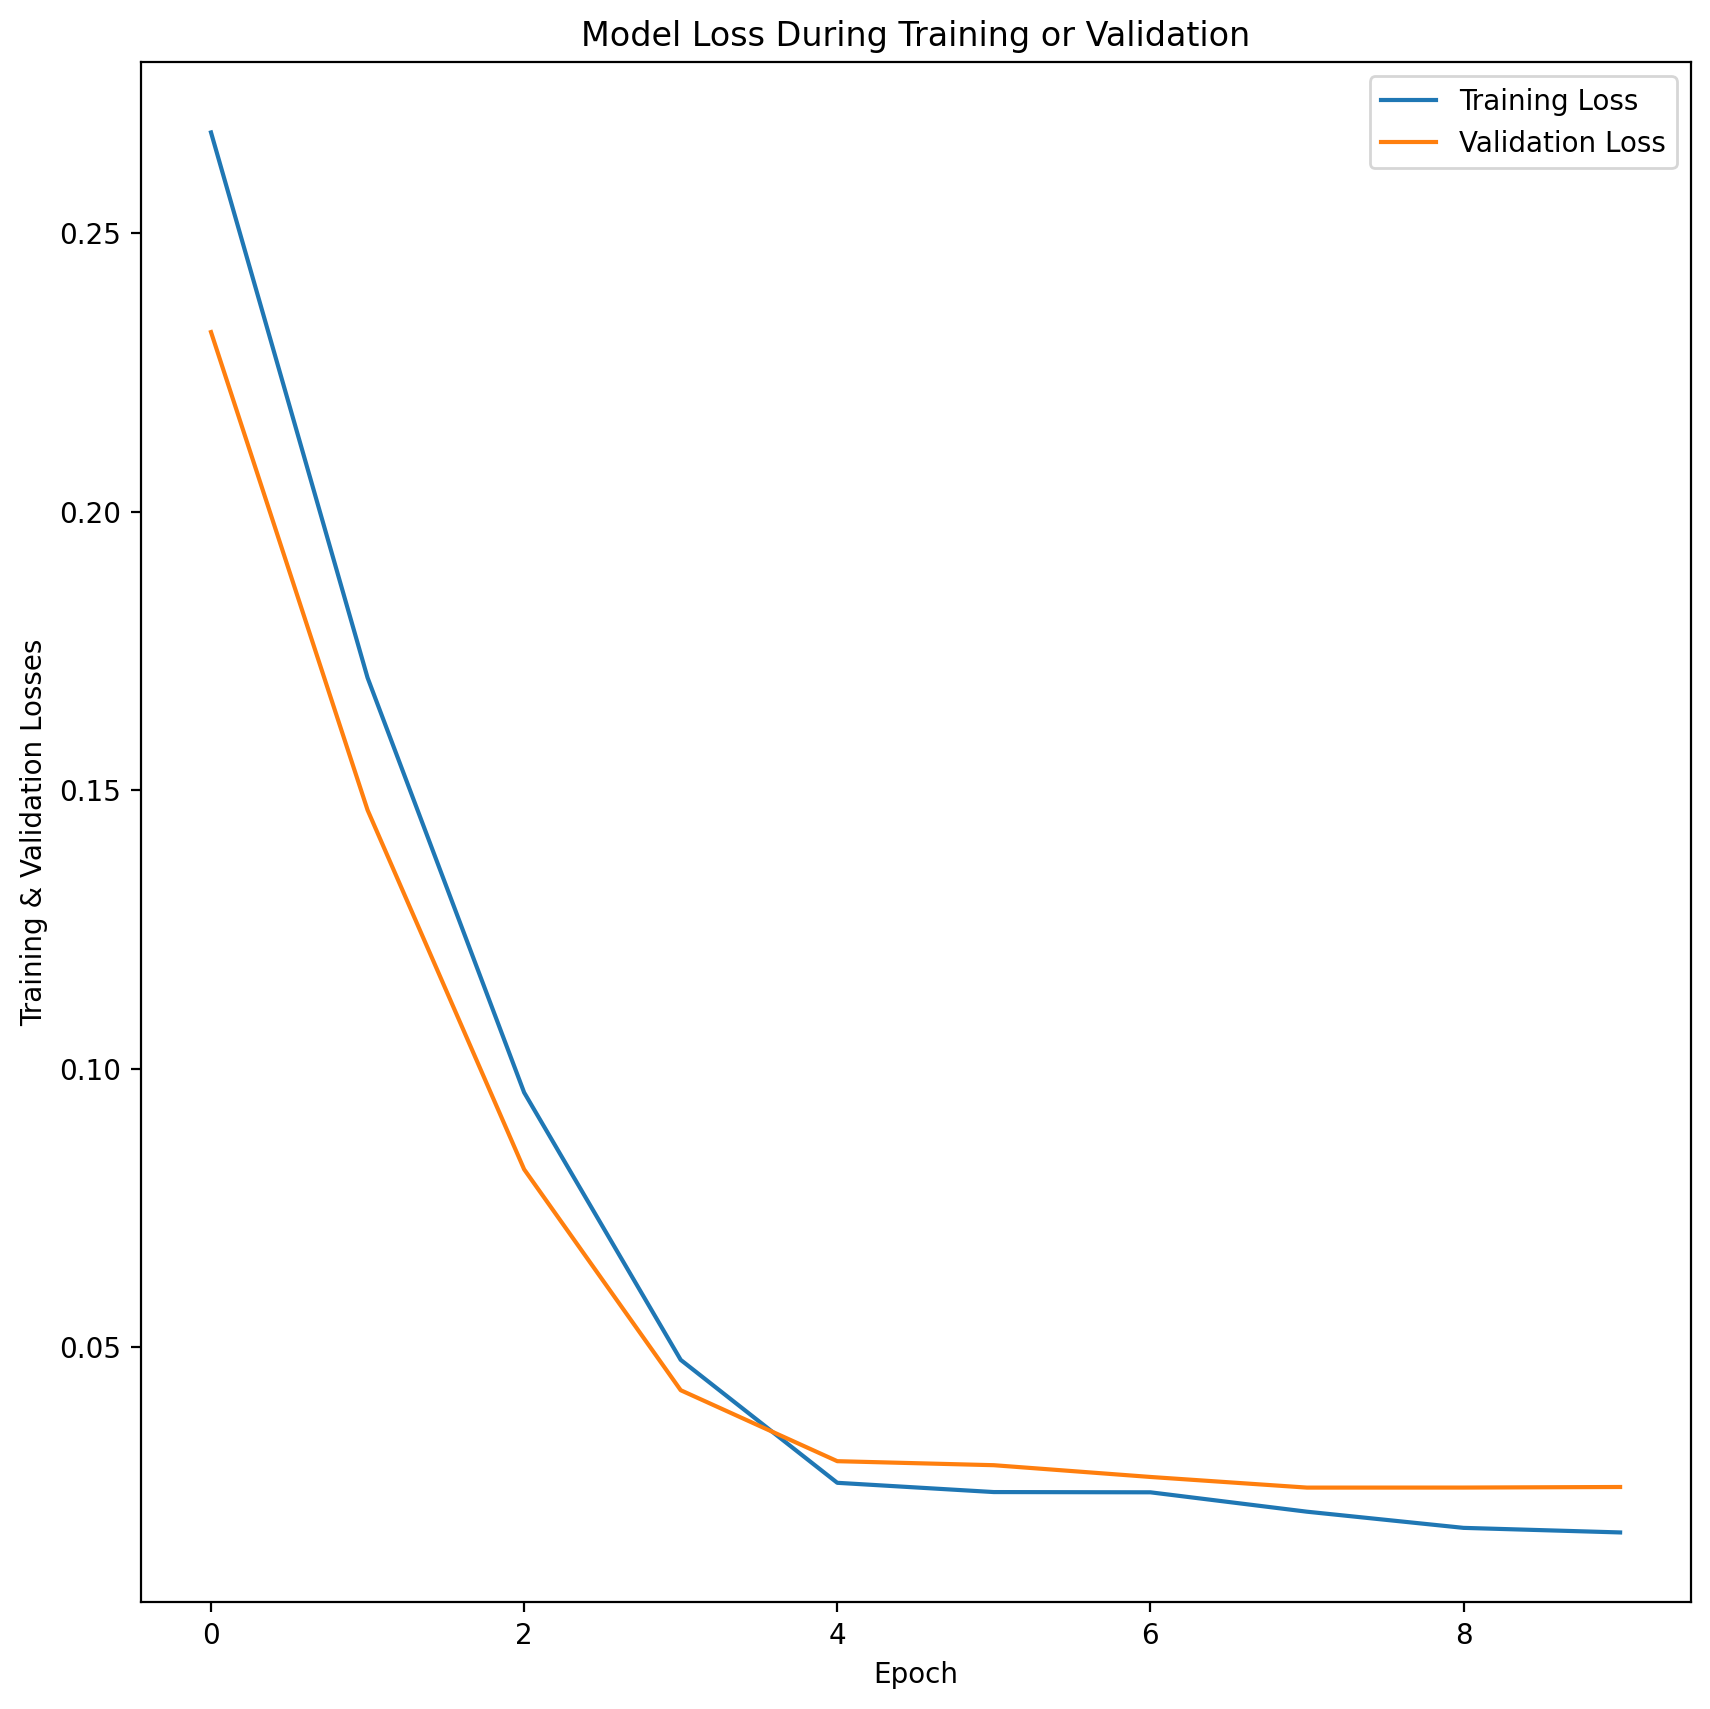

In [28]:
#Visualization 
plt.figure(figsize=(10,10),dpi=200)
plt.plot(epochs_hist.history["loss"])
plt.plot(epochs_hist.history["val_loss"])

plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])

In [29]:
#Predictions with some random data provided
X_random_sample = np.array([[0,42,167411.18,0,400184.25,567595.43,567595.43,11609.38091,238961.2505]])
y_predict = model.predict(X_random_sample)

1/1 [==============================] - 0s 102ms/step


In [30]:
y_predict.shape

(1, 1)

In [31]:
print('Predicted Purchase Amount is =', y_predict[:,0])

Predicted Purchase Amount is = [516294.6]


In [32]:
#Predictions with training dataset.
y_predict = model.predict(xtrain)
print('Predicted Purchase Amount is =', y_predict[:,0])

12/12 [==============================] - 0s 1ms/step
Predicted Purchase Amount is = [0.5957637  0.50370234 0.6184621  0.4884808  0.50189537 0.3938486
 0.41042894 0.44988203 0.42042524 0.7080527  0.4062615  0.39524794
 0.54707205 0.456384   0.46945995 0.51740503 0.46547383 0.5234844
 0.63299346 0.46391726 0.45243353 0.41409916 0.34519535 0.45769763
 0.745921   0.48929292 0.42328936 0.41132742 0.39959443 0.43496293
 0.39218205 0.3799802  0.38574904 0.45823902 0.5521771  0.5360904
 0.4855845  0.40914553 0.36841965 0.5748907  0.60345    0.38901561
 0.45223373 0.43060416 0.46710902 0.3964159  0.6090368  0.5236146
 0.47249758 0.57976526 0.39094418 0.4642595  0.5706045  0.6599621
 0.40430284 0.3649943  0.32787168 0.498362   0.53181636 0.5960744
 0.43449026 0.4512124  0.4695344  0.38442034 0.5702925  0.4462338
 0.38439906 0.44716758 0.48736626 0.5431146  0.5469395  0.4365902
 0.54902583 0.4633305  0.37994045 0.45763785 0.4594934  0.41254908
 0.6268116  0.58207834 0.60235894 0.62816465 0.468796